In [4]:
import rasterio as rio

path = "MaxarSatelliteImageKutupalongRohingyaCamps.tif"
rio.open(path)

<open DatasetReader name='MaxarSatelliteImageKutupalongRohingyaCamps.tif' mode='r'>

In [5]:
data = rio.open(path)

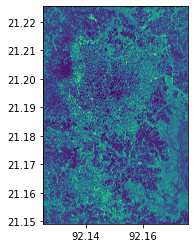

In [6]:
from rasterio.plot import show
show(data)

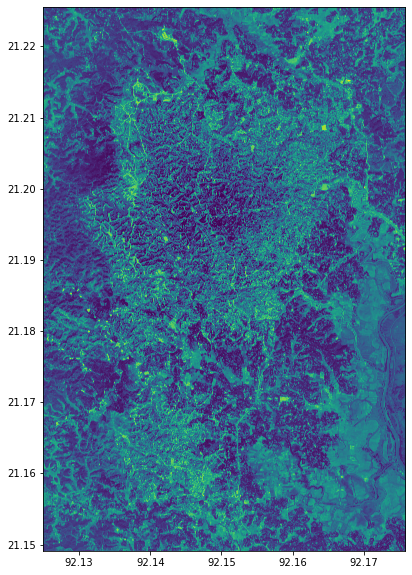

In [7]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(12,10))
show(data, ax=ax)

In [8]:
from sklearn.cluster import KMeans

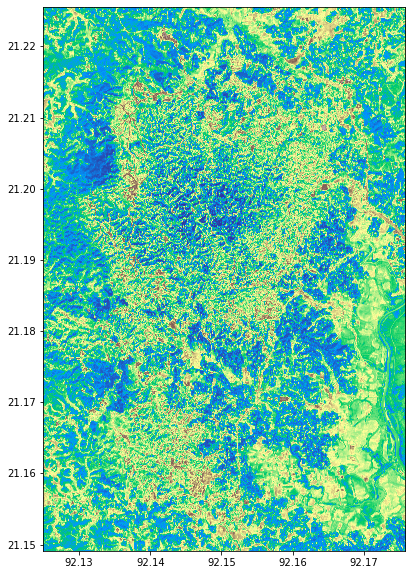

In [9]:
import matplotlib.pyplot as plt
dg=data.read(2)
dg=dg.astype(float)
fig, ax = plt.subplots(figsize=(12,10))
show(data, cmap="terrain", ax=ax)

In [10]:
dg.shape

(19020, 12680)

In [11]:
image_to_cluster = dg.reshape((-1,1))

In [12]:
image_to_cluster.shape

(241173600, 1)

In [13]:
image_to_cluster

array([[ 98.],
       [ 99.],
       [100.],
       ...,
       [ 67.],
       [ 74.],
       [ 76.]])

In [1]:
k_mean = KMeans(n_clusters=5)
k_mean.fit(image_to_cluster)

NameError: name 'KMeans' is not defined

In [2]:
import rasterio as rio
path="20190110_IOM_NPM_SA15_Imagery_Camp 01E.tif"
camp=rio.open(path)

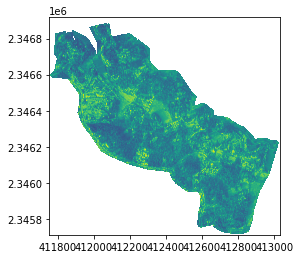

In [3]:
from rasterio.plot import show
show(camp)

In [4]:
from sklearn.cluster import KMeans

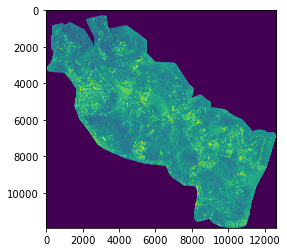

In [5]:
dgg=camp.read(2)
show(dgg)

In [6]:
dgg.shape

(11927, 12638)

In [7]:
image_to_cluster = dgg.reshape((-1,1))

In [8]:
image_to_cluster

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]], dtype=uint8)

In [9]:
k_mean = KMeans(n_clusters=5)
k_mean.fit(image_to_cluster)

KMeans(n_clusters=5)

In [10]:
clusters = k_mean.labels_
clusters

array([1, 1, 1, ..., 1, 1, 1])

In [11]:
cluster_image = clusters.reshape(dgg.shape)

In [12]:
cluster_image.shape

(11927, 12638)

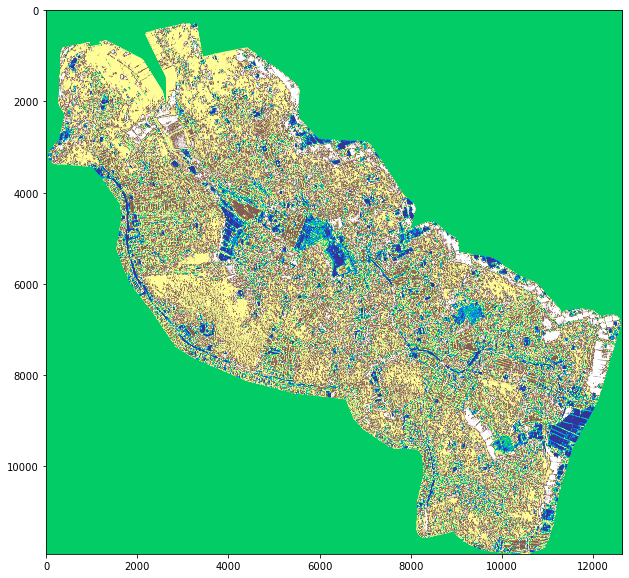

In [13]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(12,10))
show(cluster_image, cmap="terrain", ax=ax)

In [14]:
from rasterio.mask import mask

In [15]:
def derive_stats(geom, data=cluster_image):
    masked, _ = mask(dataset=data, shapes=(geom, ), crop=True, all_touched=True, filled=True)
    return mask

In [19]:
mask.to_file("camp1e")

AttributeError: 'function' object has no attribute 'to_file'

In [25]:
import rasterio as rio
with rio.open("cluster_image_1E.tif", "w",
             driver="GTiff",
             width=camp.width,
             height=camp.height,
             count=camp.count,
             crs=camp.crs,
             transform = camp.transform,
             dtype="int32"
             ) as dst:
    dst.write(cluster_image, 1)

In [21]:
dgg.shape

(11927, 12638)